Extrapolate $D_{loc}$ from MD to other channel widths, plot the results, and create FEniCS expressions.

In [1]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
#These values are taken from the notebook Hadi provided containing the MD results.
d_vals=[5.92269E-08, 5.77815E-08, 3.70681E-08,4.28487E-08, 5.41665E-08, 5.02481E-08 ]
Dbulk = 3.83145E-08

In [5]:
normD=[d/Dbulk for d in d_vals]
normD

[1.545809027913714,
 1.5080844066867634,
 0.9674692348849651,
 1.1183416200133107,
 1.4137337039502014,
 1.3114643281264273]

In [6]:
ang=[1,2,3,4,6]
paired_vals=list(zip(ang,normD))
paired_vals

[(1, 1.545809027913714),
 (2, 1.5080844066867634),
 (3, 0.9674692348849651),
 (4, 1.1183416200133107),
 (6, 1.4137337039502014)]

In [7]:
paired_vals[:2]

[(1, 1.545809027913714), (2, 1.5080844066867634)]

In [8]:
paired_vals[2]

(3, 0.9674692348849651)

In [9]:
subx_ang=[[0,1,2,2.5],[0,1,2,3,4,5],[0,1,2,3,4,6,7,7.5],[0,1,2,3,4,6,7,10]]
subx=[[x/max(row)/2 for x in row] for row in subx_ang]
subD=[[0]+normD[:2]+[(normD[1]+normD[2])/2],
      [0]+normD[:4]+[(normD[3]+normD[4])/2],
      [0]+normD+[(normD[5]*5/6+1/6)],
      [0]+normD+[1]]
# fmts=['r-','g-','b-','c-']
fmts=["c-"]*4
widths=[0.5,1.0,1.5,2.0]
labels=['0.5 nm width','1.0 nm width','1.5 nm width','2.0 nm width']

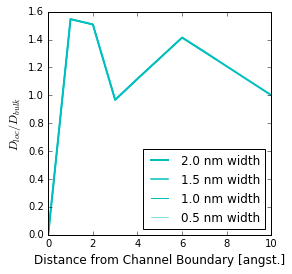

In [10]:
fig,ax=plt.subplots(figsize=(4,4))
for i in range(3,-1,-1):
  o=ax.plot(subx_ang[i],subD[i],fmts[i],label=labels[i],lw=widths[i])
o=ax.set_xlabel('Distance from Channel Boundary [angst.]',fontsize=12)
o=ax.set_ylabel('$D_{loc}/D_{bulk}$',fontsize=12)
o=ax.legend(loc='lower right',fontsize=12)

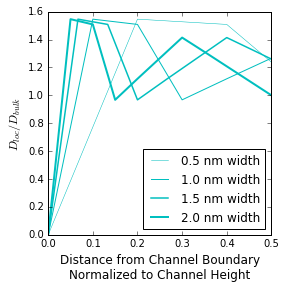

In [11]:
fig,ax=plt.subplots(figsize=(4,4))
for i in range(4):
  o=ax.plot(subx[i],subD[i],fmts[i],label=labels[i],lw=widths[i])
o=ax.set_xlabel('Distance from Channel Boundary\nNormalized to Channel Height',fontsize=12)
o=ax.set_ylabel('$D_{loc}/D_{bulk}$',fontsize=12)
o=ax.legend(loc='lower right',fontsize=12)

In [12]:
# posvals=[vals+list(reversed(vals)) for vals in subx_ang]
# posvals=[[x/10 for x in vals] for vals in posvals]
posvals=[]
for vals in subx_ang:
  newvals=[x/10 for x in vals]
  fullwidth=2*max(newvals)
  newvals+=[fullwidth-x for x in list(reversed(newvals))[1:]]
  posvals.append(newvals)
Dvals=[vals+list(reversed(vals))[1:] for vals in subD]

In [13]:
output_pairs=[list(zip(*itm)) for itm in zip(posvals,Dvals)]
# output_pairs

In [14]:
output_dict=dict(zip(labels,output_pairs))
# output_dict

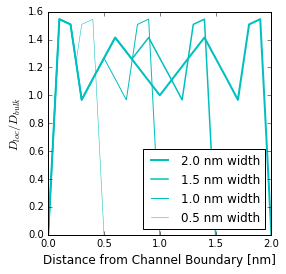

In [15]:
fig,ax=plt.subplots(figsize=(4,4))
revfmts=list(reversed(fmts))
revwidths=list(reversed(widths))
for i,lbl in enumerate(reversed(labels)):
  pts=output_dict[lbl]
  xvals,yvals=zip(*pts)
  o=ax.plot(xvals,yvals,revfmts[i],label=lbl,lw=revwidths[i])
o=ax.set_xlabel('Distance from Channel Boundary [nm]',fontsize=12)
o=ax.set_ylabel('$D_{loc}/D_{bulk}$',fontsize=12)
o=ax.legend(loc='lower right',fontsize=12)  

In [16]:
tr_tmpl="(x[1]>{ym})*(x[1]<={ym1})*({Dm1:0.3f}*(x[1]-{ym})+{Dm:0.3f}*({ym1}-x[1]))/{dely:0.3f}"
expressions={}
for lbl in labels:
  pts=output_dict[lbl]
  terms=[]
  for m in range(len(pts)-1):
    ym,Dm=pts[m]
    ym1,Dm1=pts[m+1]
    dely=ym1-ym
    tr=tr_tmpl.format(ym=ym,Dm=Dm,ym1=ym1,Dm1=Dm1,dely=dely)
    terms.append(tr)
  expr=" +\n".join(terms)
  expressions[lbl]=expr

In [17]:
for lbl in labels:
  print(lbl)
  print(expressions[lbl])

0.5 nm width
(x[1]>0.0)*(x[1]<=0.1)*(1.546*(x[1]-0.0)+0.000*(0.1-x[1]))/0.100 +
(x[1]>0.1)*(x[1]<=0.2)*(1.508*(x[1]-0.1)+1.546*(0.2-x[1]))/0.100 +
(x[1]>0.2)*(x[1]<=0.25)*(1.238*(x[1]-0.2)+1.508*(0.25-x[1]))/0.050 +
(x[1]>0.25)*(x[1]<=0.3)*(1.508*(x[1]-0.25)+1.238*(0.3-x[1]))/0.050 +
(x[1]>0.3)*(x[1]<=0.4)*(1.546*(x[1]-0.3)+1.508*(0.4-x[1]))/0.100 +
(x[1]>0.4)*(x[1]<=0.5)*(0.000*(x[1]-0.4)+1.546*(0.5-x[1]))/0.100
1.0 nm width
(x[1]>0.0)*(x[1]<=0.1)*(1.546*(x[1]-0.0)+0.000*(0.1-x[1]))/0.100 +
(x[1]>0.1)*(x[1]<=0.2)*(1.508*(x[1]-0.1)+1.546*(0.2-x[1]))/0.100 +
(x[1]>0.2)*(x[1]<=0.3)*(0.967*(x[1]-0.2)+1.508*(0.3-x[1]))/0.100 +
(x[1]>0.3)*(x[1]<=0.4)*(1.118*(x[1]-0.3)+0.967*(0.4-x[1]))/0.100 +
(x[1]>0.4)*(x[1]<=0.5)*(1.266*(x[1]-0.4)+1.118*(0.5-x[1]))/0.100 +
(x[1]>0.5)*(x[1]<=0.6)*(1.118*(x[1]-0.5)+1.266*(0.6-x[1]))/0.100 +
(x[1]>0.6)*(x[1]<=0.7)*(0.967*(x[1]-0.6)+1.118*(0.7-x[1]))/0.100 +
(x[1]>0.7)*(x[1]<=0.8)*(1.508*(x[1]-0.7)+0.967*(0.8-x[1]))/0.100 +
(x[1]>0.8)*(x[1]<=0.9)*(1.546*(x[1